In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
TUe_red='#a80707'

In [47]:
def plt_potentials(file, sim_type,temp, show_plot):
    data=np.genfromtxt(file)

    conf_number=data[:,0]
    curr_PE=data[:,1]*1.38e-23*6.022e23/1e3
    cum_av_PE=data[:,2]*1.38e-23*6.022e23/1e3

    if show_plot:
        plt.plot(conf_number,curr_PE, label=f'Current PE (KJ/mol)')
        plt.plot(conf_number,cum_av_PE, label=f'Cum AV PE (KJ/mol)')
        plt.legend()
        plt.title(f'{sim_type} at {temp}K')
        plt.ylabel('PE')
        plt.xlabel('iteration')
        plt.show()
    return conf_number,curr_PE, cum_av_PE


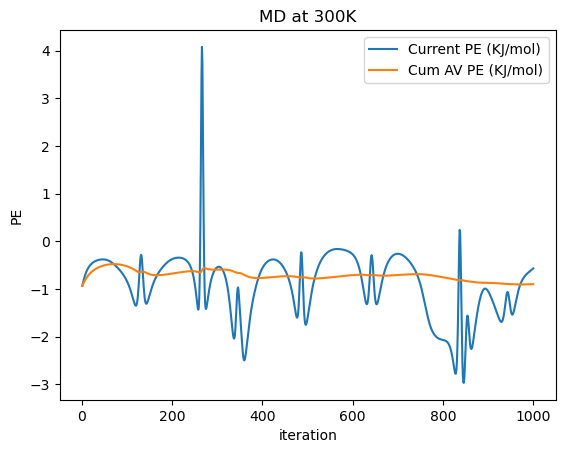

In [48]:
it,c_300,av_300=plt_potentials('02_Thermostat/300K/U_energy.dat','MD',300, True)

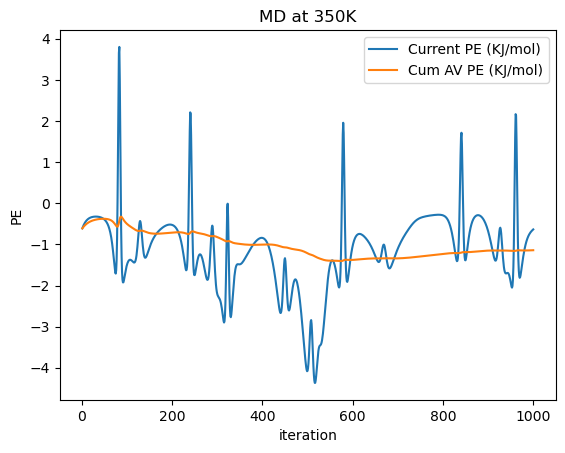

In [49]:
it,c_350,av_350=plt_potentials('02_Thermostat/350K/U_energy.dat','MD',350, True)

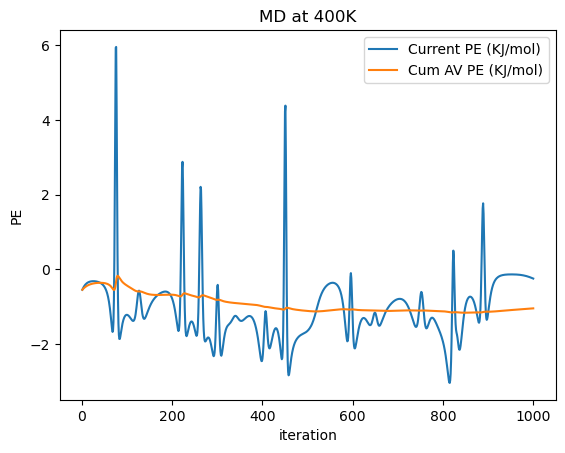

In [50]:
it,c_400,av_400=plt_potentials('02_Thermostat/400K/U_energy.dat','MD',400, True)

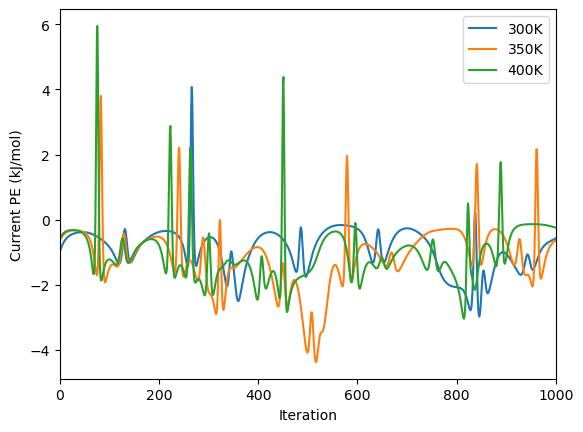

In [51]:
#compare
plt.plot(it,c_300,label='300K')
plt.plot(it,c_350,label='350K')
plt.plot(it,c_400,label='400K')
plt.ylabel(f'Current PE (kJ/mol)')
plt.xlabel('Iteration')
plt.xlim(0,1000)
plt.legend()
plt.savefig('02_MD_Temps_curr_PE',dpi=300)
plt.show()

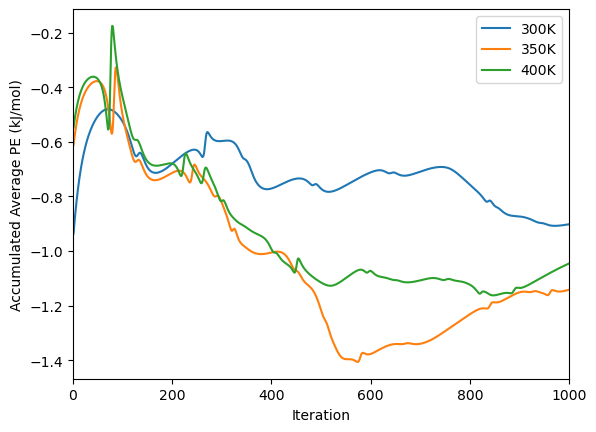

In [52]:
plt.plot(it,av_300,label='300K')
plt.plot(it,av_350,label='350K')
plt.plot(it,av_400,label='400K')
plt.ylabel('Accumulated Average PE (kJ/mol)')
plt.xlabel('Iteration')
plt.xlim(0,1000)
plt.legend()
plt.savefig('02_MD_Temps_av_PE',dpi=300)
plt.show()

# Temp Analysis

In [53]:
def plt_temps(file, sim_type,temp, show_plot):
    data=np.genfromtxt(file)

    conf_number=data[:,0]
    curr_PE=data[:,1]
    cum_av_PE=data[:,2]

    if show_plot:
        plt.plot(conf_number,curr_PE, label=f'Current Temp')
        plt.plot(conf_number,cum_av_PE, label=f'Cum AV Temp')
        plt.legend()
        plt.title(f'{sim_type} at {temp}K')
        plt.ylabel('Temperature (K)')
        plt.xlabel('iteration')
        plt.show()
    return conf_number,curr_PE, cum_av_PE

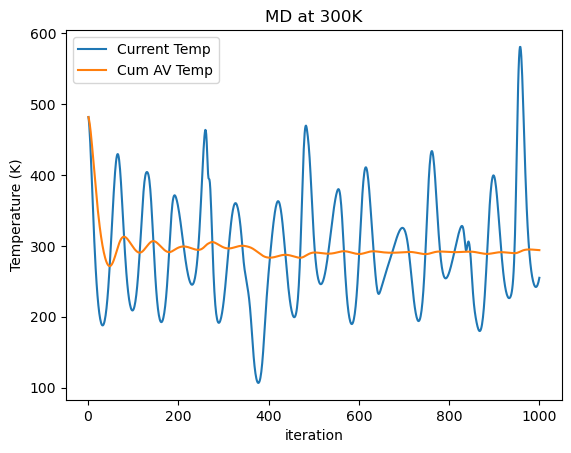

In [54]:
it_t,c_t_300,av_t_300=plt_temps('02_Thermostat/300K/Temperature.dat','MD',300, True)

In [55]:
it_t,c_t_350,av_t_350=plt_temps('02_Thermostat/350K/Temperature.dat','MD',350, False)

In [56]:
it_t,c_t_400,av_t_400=plt_temps('02_Thermostat/400K/Temperature.dat','MD',400, False)

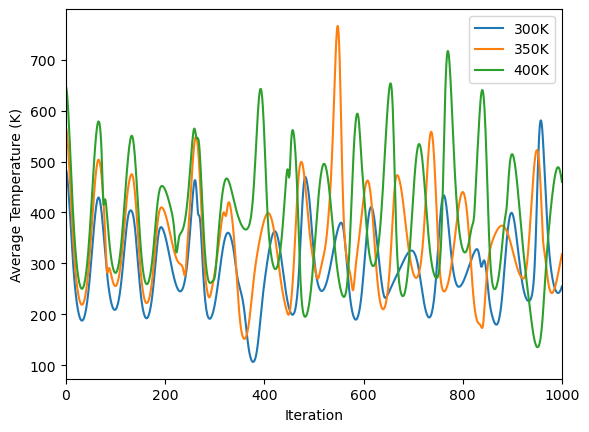

In [57]:
plt.plot(it_t,c_t_300,label='300K')
plt.plot(it_t,c_t_350,label='350K')
plt.plot(it_t,c_t_400,label='400K')
plt.ylabel('Average Temperature (K)')
plt.xlim(0,1000)
plt.xlabel('Iteration')
plt.legend()
plt.savefig('02_curr_temp_analysis',dpi=300)
plt.show()

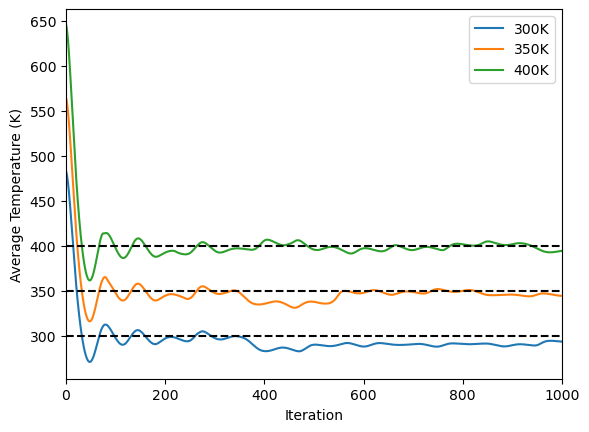

In [58]:
plt.plot(it_t,av_t_300,label='300K')
plt.plot(it_t,300*np.ones(len(it_t)), '--', c='k')
plt.plot(it_t,av_t_350,label='350K')
plt.plot(it_t,350*np.ones(len(it_t)), '--', c='k')
plt.plot(it_t,av_t_400,label='400K')
plt.plot(it_t,400*np.ones(len(it_t)), '--', c='k')
plt.ylabel('Average Temperature (K)')
plt.xlim(0,1000)
plt.xlabel('Iteration')
plt.legend()
plt.savefig('02_av_temp_analysis', dpi=300)
plt.show()

# Hoover Analysis

In [59]:
def plt_hoover(file, sim_type,temp,show_plot):
    data=np.genfromtxt(file)

    conf_number=data[:,0]
    curr_PE=data[:,1]

    if show_plot:
        plt.plot(conf_number,curr_PE)
        plt.title(f'{sim_type} at {temp}K')
        plt.ylabel('Energy of Thermostat (K)')
        plt.xlabel('iteration')
        plt.show()
    return conf_number,curr_PE

In [60]:
it_h,hoov_300=plt_hoover('02_Thermostat/300K/U_Nose-Hoover.dat','MD',300, False)

In [61]:
it_h,hoov_350=plt_hoover('02_Thermostat/350K/U_Nose-Hoover.dat','MD',350,False)

In [62]:
it_h,hoov_400=plt_hoover('02_Thermostat/400K/U_Nose-Hoover.dat','MD',400, False)

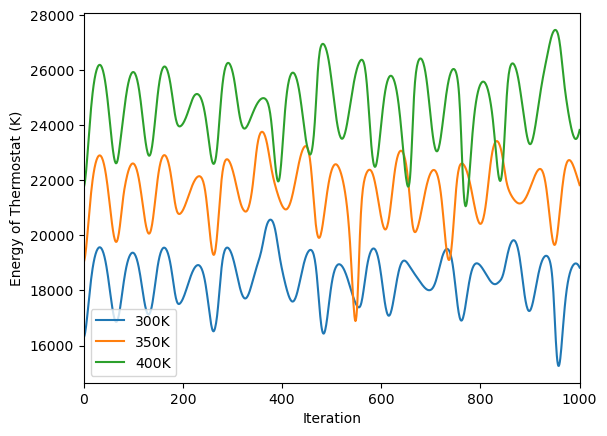

In [63]:
plt.plot(it_h,hoov_300,label='300K')
plt.plot(it_h,hoov_350,label='350K')
plt.plot(it_h,hoov_400,label='400K')
plt.ylabel('Energy of Thermostat (K)')
plt.xlim(0,1000)
plt.xlabel('Iteration')
plt.legend()
plt.savefig('02_noose_hoov',dpi=300)
plt.show()

## compare hoover to temp

In [64]:
d_hoov_300=hoov_300[1:]-hoov_300[:-1]
d_T_300=c_t_300[1:]-c_t_300[:-1]

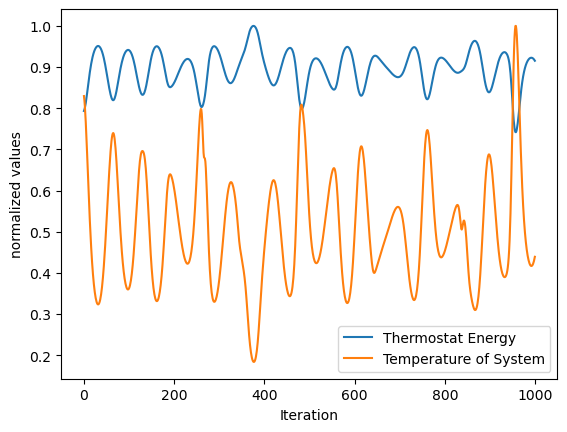

In [65]:
plt.plot(hoov_300/max(hoov_300),label='Thermostat Energy')
plt.plot(c_t_300/ max(c_t_300), label='Temperature of System')
plt.ylabel('normalized values')
plt.xlabel('Iteration')
plt.legend()
plt.show()

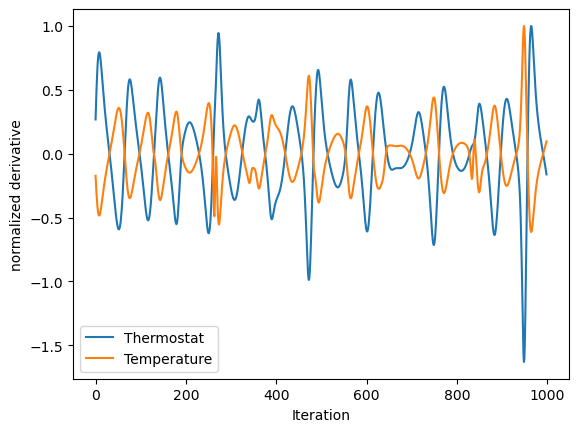

In [66]:
plt.plot(d_hoov_300/max(d_hoov_300), label=r'Thermostat')
plt.plot(d_T_300/max(d_T_300), label=r'Temperature')
plt.ylabel('normalized derivative')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('02_Noose_vs_Temp',dpi=300)
plt.show()

In [67]:
def plt_RDF(file, sim_type,temp,show_plot):
    data=np.genfromtxt(file)

    index=data[:,0]
    distance=data[:,1]
    rdf=data[:,2]
    n_rdf=data[:,3]

    if show_plot:
        plt.plot(distance,rdf)
        plt.xlabel('Distance (Angstrom)')
        plt.ylabel('RDF')
        plt.title(f'{sim_type} RDF at {temp}')
        plt.show()
    return distance, rdf, n_rdf
    

In [68]:
d,rdf_300,nrdf_300=plt_RDF('02_RDFs/300K/RadialDistributionFunctions/System_0/RDF_CH4_amm_CH4_amm.dat','MD',300,False)

In [69]:
d,rdf_350,nrdf_350=plt_RDF('02_RDFs/350K/RadialDistributionFunctions/System_0/RDF_CH4_amm_CH4_amm.dat','MD',350,False)

In [70]:
d,rdf_400,nrdf_400=plt_RDF('02_RDFs/400K/RadialDistributionFunctions/System_0/RDF_CH4_amm_CH4_amm.dat','MD',400,False)

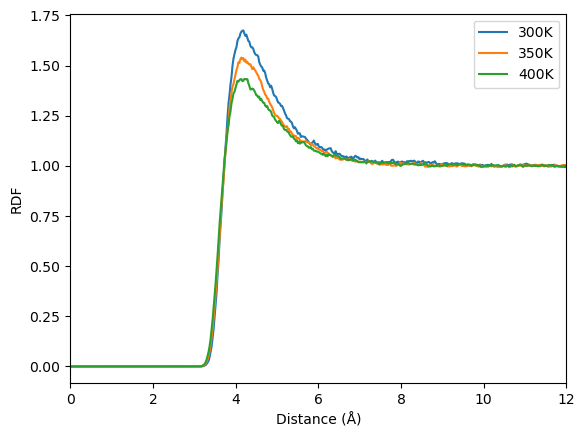

In [71]:
plt.plot(d,rdf_300, label='300K')
plt.plot(d, rdf_350, label='350K')
plt.plot(d,rdf_400, label='400K')
plt.xlabel('Distance (Å)')
plt.ylabel('RDF')
plt.xlim(0,12)
plt.legend()
plt.savefig('02_RDF_temps',dpi=300)
plt.show()


In [72]:
def Lennard_Jones(r):
    epsilon,sigma=148,3.73
    s_6=(sigma/r)**6
    s_12=s_6**2
    return(4*epsilon*(s_12-s_6))

In [73]:
LJ=Lennard_Jones(d)

Text(0, 0.5, 'Potential Energy $(K/k_B)$')

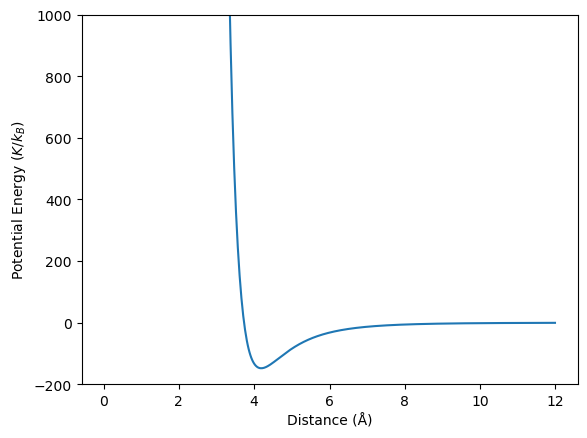

In [74]:
plt.plot(d,LJ)
plt.ylim(-200,1000)
plt.xlabel('Distance (Å)')
plt.ylabel(f'Potential Energy $(K/k_B)$')

In [75]:
mask=np.where(LJ==LJ.min())
print(f'The minimum of LJ is {LJ.min()} ($K/k_B$), at {d[mask]} ,LJ hits zero at {fsolve(Lennard_Jones,4)} angstrom')

The minimum of LJ is -147.999551061317 ($K/k_B$), at [4.188] ,LJ hits zero at [3.73] angstrom


In [76]:
d_LJ=LJ[1:]-LJ[:-1]
d_rdf300=rdf_300[1:]-rdf_300[:-1]

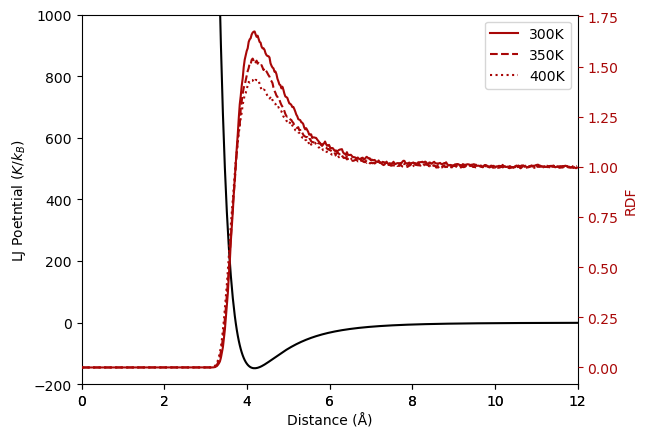

In [77]:
fig=plt.figure()
ax=fig.add_subplot(111,label='1')
ax2=fig.add_subplot(111, label='2', frame_on=False)

ax.plot(d,LJ, c='k',label=f'Lennard Jones Potential')
ax.set_xlabel('Distance (Å)')
ax.set_ylabel(f'LJ Poetntial ($K/k_B$)')
ax.set_ylim(-200,1000)
ax.set_xlim(0,12)

ax2.plot(d,rdf_300, '-' ,c=TUe_red, label='300K')
ax2.plot(d,rdf_350,'--' ,c=TUe_red, label='350K')
ax2.plot(d,rdf_400, ':', c=TUe_red, label='400K')
ax2.yaxis.tick_right()
ax2.set_ylabel('RDF', color=TUe_red)
ax2.tick_params(axis='y', colors=TUe_red)
ax2.yaxis.set_label_position('right')
ax2.set_xlim(0,12)

plt.legend()
plt.savefig('02_LJ_vs_RDF',dpi=300)
plt.show()

In [78]:
def D(file, sim_type, temp, show_plot):
    data=np.genfromtxt(file)
    time=data[:,0]
    msd_xyz=data[:,1]
    msd_x=data[:,2]
    msd_y=data[:,3]
    msd_z=data[:,4]
    n_samples=data[:,5]

    # 1-9ns region
    ns_mask=np.where((time>1000) & (time<9000))
    slope,_=np.polyfit(time[ns_mask], msd_xyz[ns_mask],1)
    Diff=slope/6

    if show_plot:
        plt.plot(time,msd_xyz, '-')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Time (ps)')
        plt.ylabel('MSD ($Å^2$)')
        plt.title(f'MSD for {sim_type} simulation at {temp}K')
        plt.show()
    return time, msd_xyz, Diff


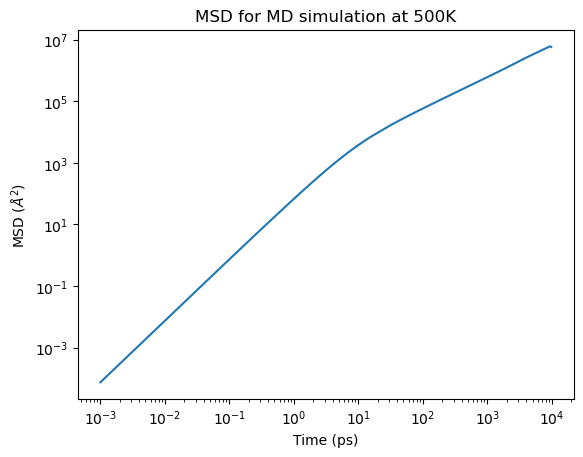

In [79]:
t,msd_500, D_500=D('02_MSD-data/msd_500.dat', 'MD',500,True)

In [80]:
temp_list=[300,350,400,450,500]
D_list=[]
for i, temp in enumerate(temp_list):
    _,_,Diff=D(f'02_MSD-data/msd_{temp}.dat', 'MD',temp,False)
    s_diff=Diff*1e-5 #convert to self diffusion
    D_list.append(s_diff)


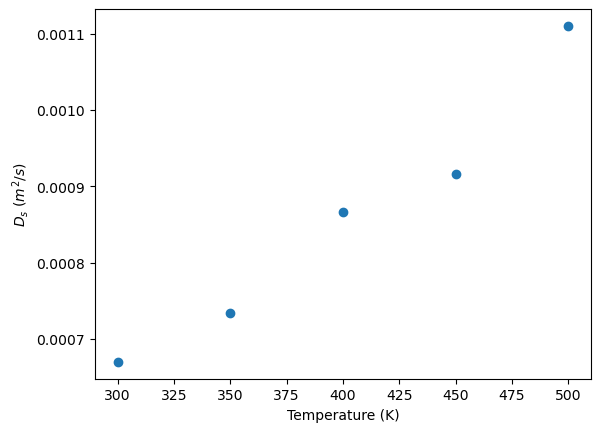

In [81]:
plt.plot(temp_list,D_list, 'o')
plt.xlabel('Temperature (K)')
plt.ylabel(f'$D_s$ $(m^2/s)$')
plt.savefig('02_Dc_vs_T',dpi=300)
plt.show()

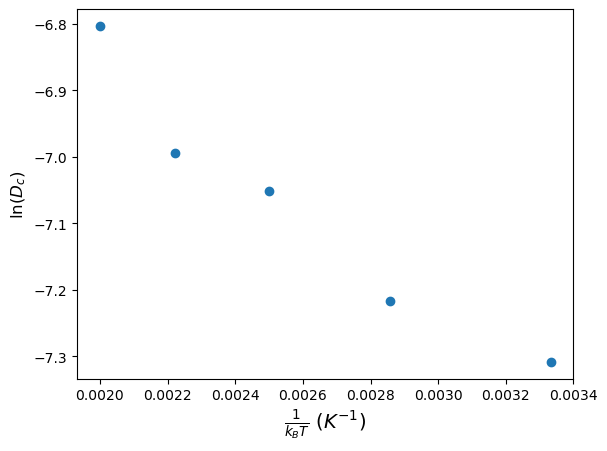

In [82]:
plt.plot(1/(np.array(temp_list)),np.log(np.array(D_list)), 'o')
plt.xlabel(r'$\frac{1}{k_B T}$ $(K^{-1})$', fontsize=14)
plt.ylabel(r'ln($D_c$)', fontsize=12)
plt.show()

In [83]:
m,c=np.polyfit(1/(np.array(temp_list)),np.log(np.array(D_list)),1)

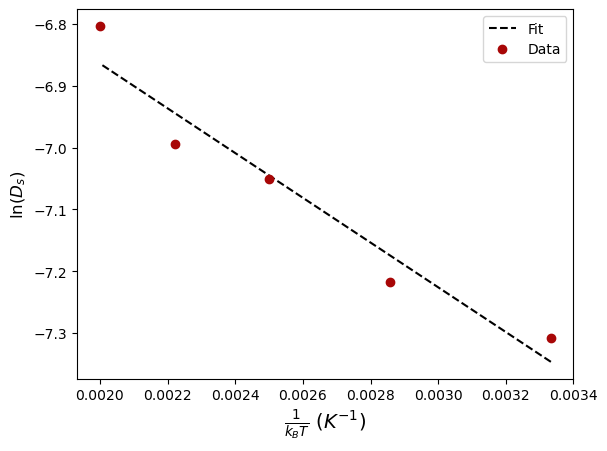

In [84]:
plt.plot(1/(np.array(temp_list)), m*1/(np.array(temp_list))+c,'--', c='k', label=f'Fit')
plt.plot(1/(np.array(temp_list)),np.log(np.array(D_list)), 'o', c=TUe_red, label='Data')
plt.xlabel(r'$\frac{1}{k_B T}$ $(K^{-1})$', fontsize=14)
plt.ylabel(r'ln($D_s$)', fontsize=12)
plt.legend()
plt.savefig('02_lnDc_invT',dpi=300)
plt.show()

In [85]:
print(f'-Slope is activation energy, thus activation energy is {-m} kJ/mol') 

-Slope is activation energy, thus activation energy is 362.05953895754976 kJ/mol


In [86]:
log_D_250=m*1/250+c
D_250=np.exp(log_D_250)
log_D_550=m*1/550+c
D_550=np.exp(log_D_550)
print(f'the diffusion at 250K is {D_250} ($m^2/s$), the diffucion at 550K is {D_550} ($m^2/s$)')

the diffusion at 250K is 0.0005063663183029603 ($m^2/s$), the diffucion at 550K is 0.001115667814725129 ($m^2/s$)


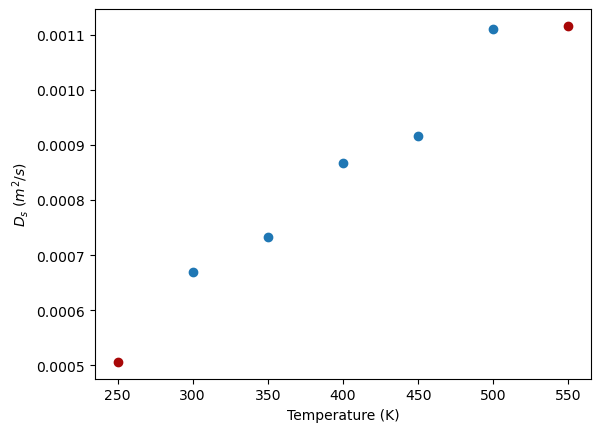

In [87]:
plt.plot(temp_list,D_list, 'o')
plt.plot(250,D_250, 'o', c=TUe_red)
plt.plot(550, D_550,'o' ,c=TUe_red)
plt.xlabel('Temperature (K)')
plt.ylabel(f'$D_s$ $(m^2/s)$')
plt.savefig('02_exrapolated',dpi=300)
plt.show()